In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/capstone_final_preprocessed_data.csv')

In [ ]:
data=data.drop('Unnamed: 0',axis=1)

In [ ]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign__erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,6.0,6.0,11/03/2016,4000.0,4000.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign__erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,7.0,7.0,12/03/2017,1.0,500.0,tourist_hotel/motel,143.0,tourist_hotel_motel,143.0,2.0,3.0,constr_type_3,3.0,constr_type_3,3.0,tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201611072166,8,otc_alterations_permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1_family_dwelling,1.0,1_family_dwelling,1.0,2.0,5.0,wood_frame_5,5.0,wood_frame_5,3.0,nob_hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
3,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,3.0,3.0,12/01/2018,100000.0,100000.0,retail_sales,1.0,retail_sales,1.0,2.0,3.0,constr_type_3,3.0,constr_type_3,6.0,tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
4,201706149344,8,otc_alterations_permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr_type_1,1.0,constr_type_1,10.0,potrero_hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855


In [ ]:
model_df=data[['Permit Type','Current Status','Number of Existing Stories',
       'Number of Proposed Stories','Revised Cost','Existing Units' ,'Proposed Units','Plansets','Proposed Construction Type',
       'Existing Construction Type','Supervisor District','Zipcode','Estimated Cost']]

In [ ]:
model_df.head()

,Permit Type,Current Status,Number of Existing Stories,Number of Proposed Stories,Revised Cost,Existing Units,Proposed Units,Plansets,Proposed Construction Type,Existing Construction Type,Supervisor District,Zipcode,Estimated Cost
0,4,expired,6.0,6.0,4000.0,143.0,143.0,2.0,3.0,3.0,3.0,94102.0,4000.0
1,4,issued,7.0,7.0,500.0,143.0,143.0,2.0,3.0,3.0,3.0,94102.0,1.0
2,8,complete,2.0,2.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0,94109.0,2000.0
3,6,issued,3.0,3.0,100000.0,1.0,1.0,2.0,3.0,3.0,6.0,94102.0,100000.0
4,8,issued,5.0,5.0,4000.0,326.0,326.0,2.0,1.0,1.0,10.0,94107.0,4000.0


encoding current status

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
model_df['Current Status']=le.fit_transform(model_df['Current Status'])

In [ ]:
x=model_df.drop('Revised Cost',axis=1)
y=model_df['Revised Cost']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scal = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression_model.score(X_test,y_test)

0.9647665036189423

In [ ]:
regression_model.score(X_train,y_train)

0.9511042627309862

**Getting 96% accuracy in test data and 95% accuracy in train data**

Using robust scaler to see if accracy improves or not

In [ ]:
from sklearn.preprocessing import RobustScaler
s = RobustScaler()
x_scal = s.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model=LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regression_model.score(X_test,y_test)

0.9549865664211695

In [ ]:
regression_model.score(X_train,y_train)

0.9544835298596593

Using decision trees regressor(to see if different algorithm is useful or not)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()


In [ ]:
reg_decision_model.fit(X_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
reg_decision_model.score(X_train,y_train)


0.9999725035499527

In [ ]:
reg_decision_model.score(X_test,y_test)


0.8840239728976926

clearly it is overfitting the model. so we will use hyperparameter tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9],
           "min_samples_leaf":[1,2,3,4,5,],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30] }

In [ ]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [ ]:
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best, score=-10369106392270.854, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best, score=-3433722797165.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=best, score=-9610755452755.770, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, splitter=random, score=-10144322760614.697, total=   0.0s
[CV] max_depth=1, max_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best, score=-10369106392270.854, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best, score=-3433722797165.042, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=best, score=-9610755452755.770, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random, score=-8091185909170.319, total=   0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitter=random 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=None, min_samples_leaf=2, splitt

[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'm

These are the best parameters

In [ ]:
tuning_model.best_params_


{'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [ ]:
tuning_model.best_score_


-1631181845386.7793

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(x_train, Y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 7, 'min_samples_split': 10}
3165408003343.5186


In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=7,min_samples_leaf=10)

In [ ]:
tuned_hyper_model.fit(x_train,Y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
tuned_pred=tuned_hyper_model.predict(x_test)


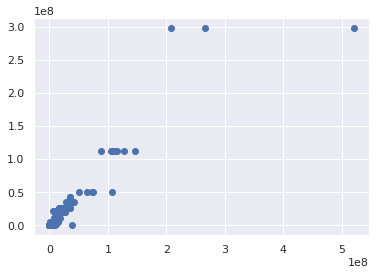

In [ ]:
plt.scatter(Y_test,tuned_pred)

In [ ]:
print(tuned_hyper_model.score(x_train, Y_train))


0.7964318400983528


In [ ]:
print(tuned_hyper_model.score(x_test, Y_test))



0.8748142382644217


In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(Y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, tuned_pred)))

MAE: 36676.32024325608
MSE: 1261550196230.8623
RMSE: 1123187.5160590338
